<a href="https://colab.research.google.com/github/Tejaswini-Gsl/neural-networks/blob/main/ICP_6(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.feature_extraction.tests import test_image

In [47]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

(28, 28)
784


In [48]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 6s 24ms/step - loss: 0.2966 - accuracy: 0.9094 - val_loss: 0.1328 - val_accuracy: 0.9570
Epoch 2/10
235/235 [==============================] - 7s 28ms/step - loss: 0.1003 - accuracy: 0.9698 - val_loss: 0.1393 - val_accuracy: 0.9577
Epoch 3/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0635 - accuracy: 0.9801 - val_loss: 0.0795 - val_accuracy: 0.9739
Epoch 4/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0430 - accuracy: 0.9863 - val_loss: 0.0825 - val_accuracy: 0.9750
Epoch 5/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0588 - val_accuracy: 0.9818
Epoch 6/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0755 - val_accuracy: 0.9786
Epoch 7/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0163 - accuracy: 0.9952 - val_loss: 0.0694 - val_accuracy: 0.9801

1. Plot the loss and accuracy for both training data and validation data using the history object in the source
code.

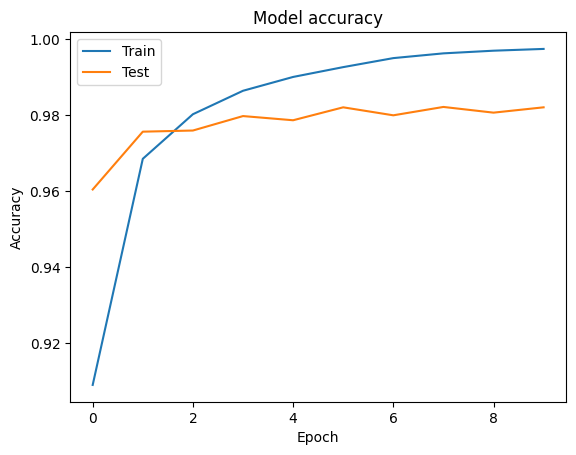

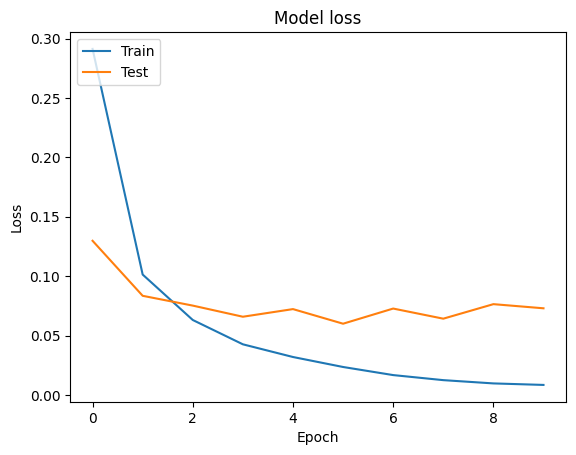

In [39]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


2. Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model
on that single image.


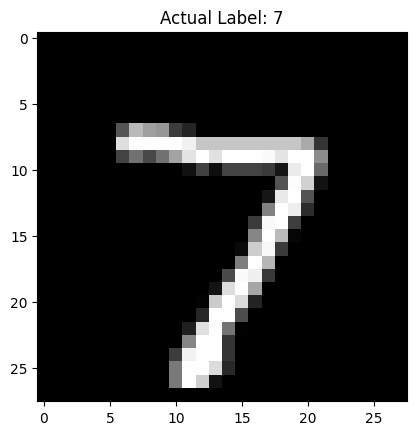

In [52]:

image_index = 0 # You can choose any index from 0 to 9999
plt.imshow(test_images[image_index], cmap='gray')
plt.title(f'Actual Label: {test_labels[image_index]}')
plt.show()


In [54]:
# Predict the class
pred = model.predict(test_data[[image_index], :])
predicted_class = np.argmax(pred, axis=1)

print(f'Predicted Label: {predicted_class[0]}')


1/1 [==============================] - 0s 34ms/step
Predicted Label: 7


We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the
activation to tanh or sigmoid and see what happens

Epoch 1/10
235/235 [==============================] - 7s 26ms/step - loss: 0.3388 - accuracy: 0.8971 - val_loss: 0.2003 - val_accuracy: 0.9407
Epoch 2/10
235/235 [==============================] - 5s 23ms/step - loss: 0.1472 - accuracy: 0.9559 - val_loss: 0.1507 - val_accuracy: 0.9532
Epoch 3/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0983 - accuracy: 0.9700 - val_loss: 0.1130 - val_accuracy: 0.9644
Epoch 4/10
235/235 [==============================] - 6s 24ms/step - loss: 0.0710 - accuracy: 0.9778 - val_loss: 0.0936 - val_accuracy: 0.9702
Epoch 5/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0531 - accuracy: 0.9838 - val_loss: 0.0872 - val_accuracy: 0.9729
Epoch 6/10
235/235 [==============================] - 7s 29ms/step - loss: 0.0414 - accuracy: 0.9873 - val_loss: 0.1080 - val_accuracy: 0.9653
Epoch 7/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.1033 - val_accuracy: 0.9687

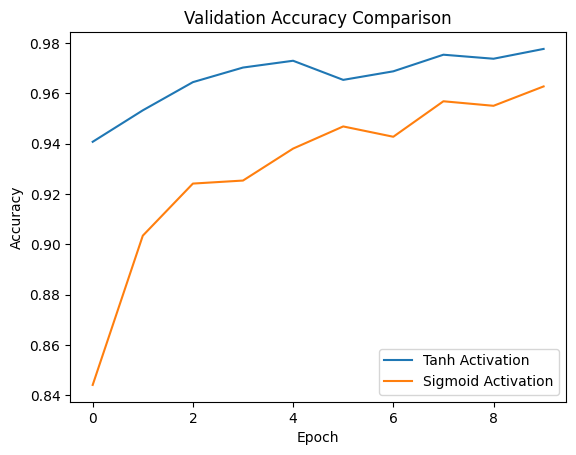

In [59]:
def create_and_train_model(activation):
    model = Sequential()
    model.add(Dense(512, activation=activation, input_shape=(dimData,)))
    # Additional hidden layers
    model.add(Dense(256, activation=activation))
    model.add(Dense(128, activation=activation))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                        validation_data=(test_data, test_labels_one_hot))
    return history, model

# Train models with different activation functions
history_tanh, model_tanh = create_and_train_model('tanh')
history_sigmoid, model_sigmoid = create_and_train_model('sigmoid')

# Plot accuracy for both models
plt.plot(history_tanh.history['val_accuracy'], label='Tanh Activation')
plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid Activation')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Run the same code without scaling the images and check the performance?


In [60]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

train_data = train_data.astype('float')
test_data = test_data.astype('float')

# change the labels from integer to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                    validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))


Epoch 1/10
235/235 [==============================] - 7s 26ms/step - loss: 3.5550 - accuracy: 0.8918 - val_loss: 0.6099 - val_accuracy: 0.9351
Epoch 2/10
235/235 [==============================] - 7s 29ms/step - loss: 0.3164 - accuracy: 0.9549 - val_loss: 0.4257 - val_accuracy: 0.9489
Epoch 3/10
235/235 [==============================] - 6s 25ms/step - loss: 0.1580 - accuracy: 0.9709 - val_loss: 0.3935 - val_accuracy: 0.9528
Epoch 4/10
235/235 [==============================] - 7s 30ms/step - loss: 0.1034 - accuracy: 0.9805 - val_loss: 0.3570 - val_accuracy: 0.9579
Epoch 5/10
235/235 [==============================] - 6s 24ms/step - loss: 0.0796 - accuracy: 0.9840 - val_loss: 0.3391 - val_accuracy: 0.9589
Epoch 6/10
235/235 [==============================] - 7s 29ms/step - loss: 0.0936 - accuracy: 0.9815 - val_loss: 0.3342 - val_accuracy: 0.9620
Epoch 7/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0941 - accuracy: 0.9820 - val_loss: 0.3819 - val_accuracy: 0.9600

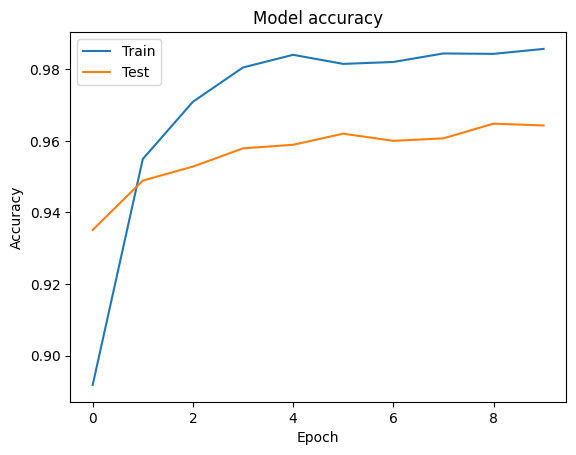

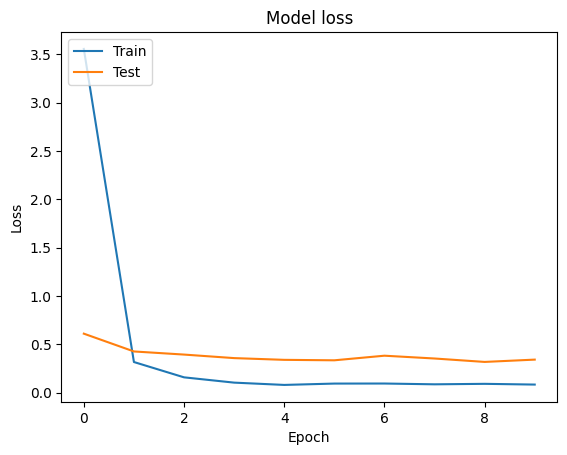

In [61]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()